In [60]:
import pickle
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from utils import check_in_weights, check_out_weights

In [61]:
# load graph object from file
G = pickle.load(open('graphs/normalized_march_22_home_origin.pickle', 'rb')) # TAKING THE NETWORK WITH NORMALIZED WEIGHTS 
income = gpd.read_file('/Users/caro/Desktop/thesis_project/segregation_indices/data/processed/geometries_and_income.geojson')

In [62]:
in_weights = check_in_weights(G)
out_weights = check_out_weights(G)

# Convert dictionaries to DataFrames
in_weights_df = pd.DataFrame(list(in_weights.items()), columns=['District', 'Total In-weight'])
out_weights_df = pd.DataFrame(list(out_weights.items()), columns=['District', 'Total Out-weight'])

Node Centro Total In-weight: 5.91
Node Arganzuela Total In-weight: 3.95
Node Retiro Total In-weight: 4.28
Node Salamanca Total In-weight: 5.54
Node Chamartín Total In-weight: 5.26
Node Tetuán Total In-weight: 4.14
Node Chamberí Total In-weight: 5.43
Node Fuencarral-El Pardo Total In-weight: 5.2
Node Moncloa-Aravaca Total In-weight: 4.92
Node Latina Total In-weight: 2.86
Node Carabanchel Total In-weight: 3.45
Node Usera Total In-weight: 3.06
Node Puente de Vallecas Total In-weight: 4.05
Node Moratalaz Total In-weight: 2.72
Node Ciudad Lineal Total In-weight: 4.65
Node Hortaleza Total In-weight: 4.49
Node Villaverde Total In-weight: 2.46
Node Villa de Vallecas Total In-weight: 3.06
Node Vicálvaro Total In-weight: 2.82
Node San Blas-Canillejas Total In-weight: 4.28
Node Barajas Total In-weight: 3.34
Node Centro Total Out-weight: 3.63
Node Arganzuela Total Out-weight: 3.66
Node Retiro Total Out-weight: 3.64
Node Salamanca Total Out-weight: 3.62
Node Chamartín Total Out-weight: 3.53
Node Te

In [63]:
in_weights_df['Median income per consumption unit'] = income['Median income per consumption unit'] / 1000
in_weights_df['Gini Index'] = income['Gini Index']

out_weights_df['Median income per consumption unit'] = income['Median income per consumption unit'] / 1000
out_weights_df['Gini Index'] = income['Gini Index']

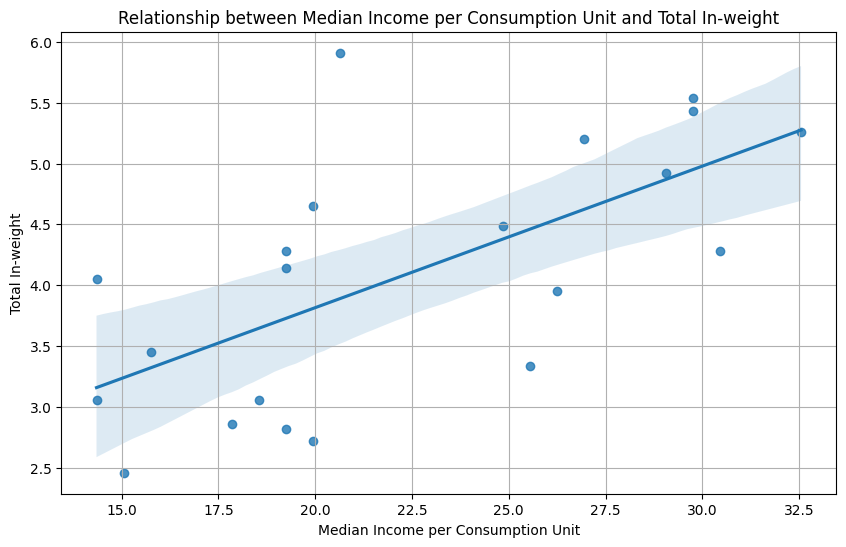

In [64]:
plt.figure(figsize=(10, 6)) # use 32.5 to improve explicability
sns.regplot(x='Median income per consumption unit', y='Total In-weight', data=in_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total In-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total In-weight')
plt.grid(True)
plt.show()

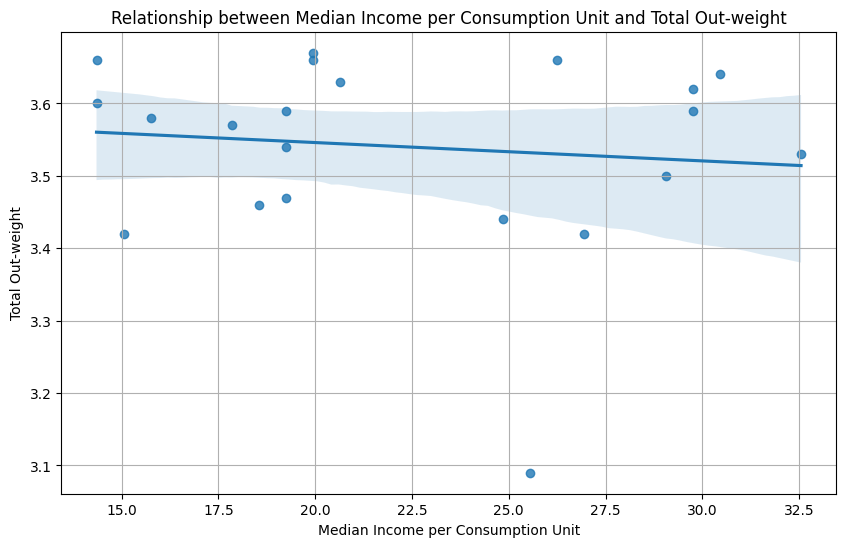

In [65]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Median income per consumption unit', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total Out-weight')
plt.grid(True)
plt.show()

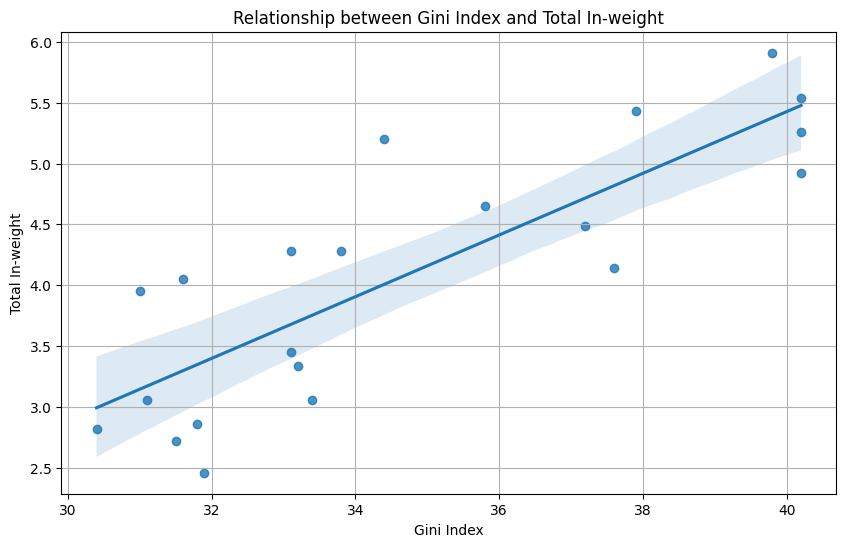

In [66]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total In-weight', data=in_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total In-weight')
plt.title('Relationship between Gini Index and Total In-weight')
plt.grid(True)
plt.show()

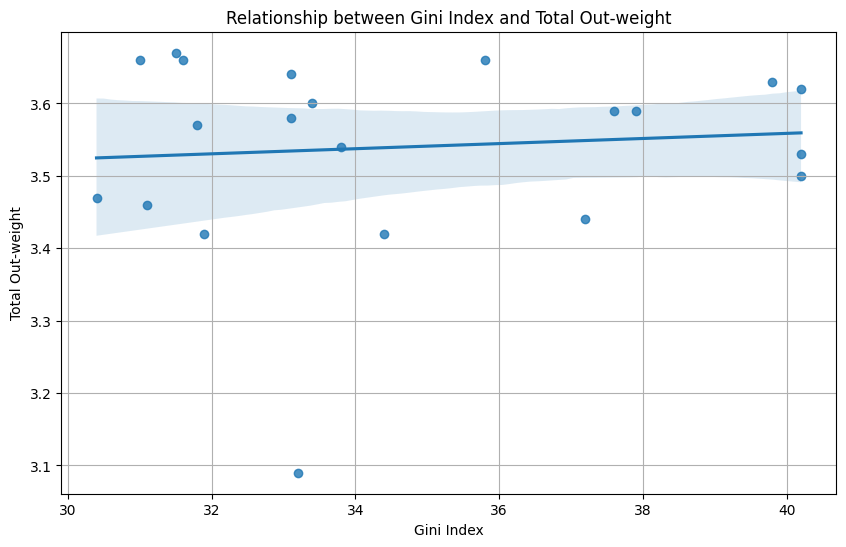

In [67]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Gini Index and Total Out-weight')
plt.grid(True)
plt.show()

In [74]:
X = in_weights_df['Median income per consumption unit']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     13.81
Date:                Tue, 26 Nov 2024   Prob (F-statistic):            0.00146
Time:                        10:32:47   Log-Likelihood:                -24.466
No. Observations:                  21   AIC:                             52.93
Df Residuals:                      19   BIC:                             55.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

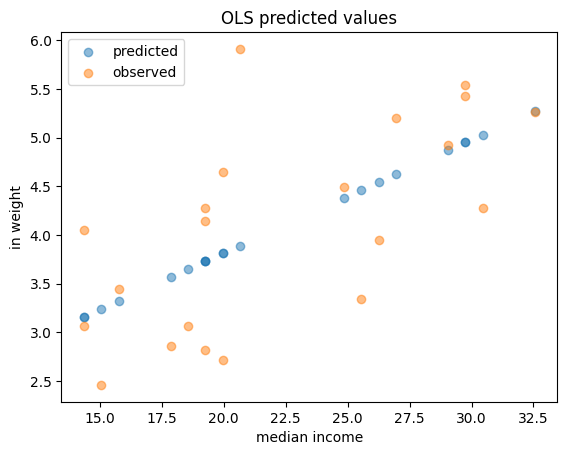

In [82]:
fix, ax = plt.subplots()
ax.scatter(in_weights_df['Median income per consumption unit'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(in_weights_df['Median income per consumption unit'], in_weights_df['Total In-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('median income')
ax.set_ylabel('in weight')
plt.show()

In [83]:
X = out_weights_df['Median income per consumption unit']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.2398
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.630
Time:                        10:46:36   Log-Likelihood:                 13.325
No. Observations:                  21   AIC:                            -22.65
Df Residuals:                      19   BIC:                            -20.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

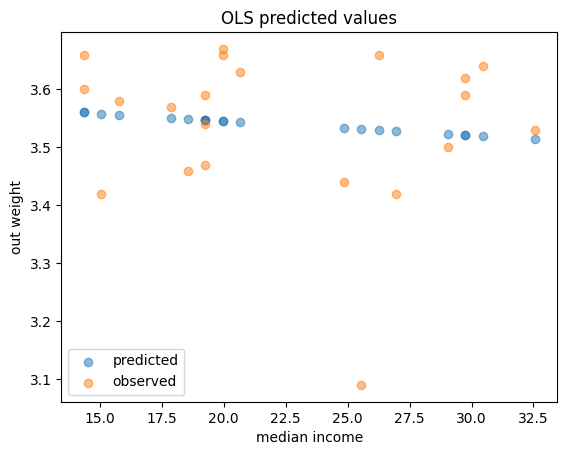

In [84]:
fix, ax = plt.subplots()
ax.scatter(out_weights_df['Median income per consumption unit'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(out_weights_df['Median income per consumption unit'], out_weights_df['Total Out-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('median income')
ax.set_ylabel('out weight')
plt.show()

In [85]:
X = in_weights_df['Gini Index']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     42.04
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           3.26e-06
Time:                        10:47:19   Log-Likelihood:                -17.947
No. Observations:                  21   AIC:                             39.89
Df Residuals:                      19   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7103      1.363     -3.455      0.0

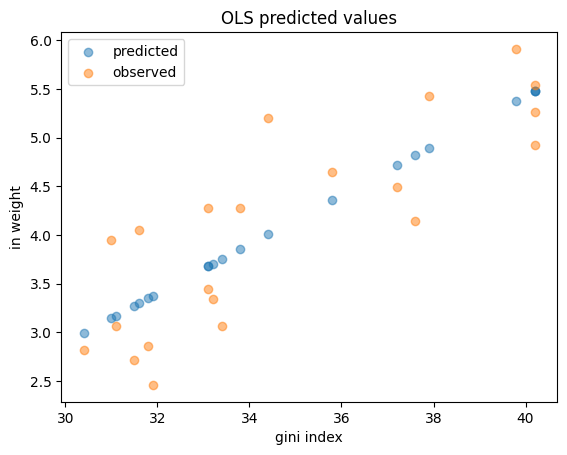

In [86]:
fix, ax = plt.subplots()
ax.scatter(in_weights_df['Gini Index'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(in_weights_df['Gini Index'], in_weights_df['Total In-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('gini index')
ax.set_ylabel('in weight')
plt.show()

In [88]:
X = out_weights_df['Gini Index']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.1596
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.694
Time:                        10:48:22   Log-Likelihood:                 13.281
No. Observations:                  21   AIC:                            -22.56
Df Residuals:                      19   BIC:                            -20.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4175      0.308     11.089      0.0

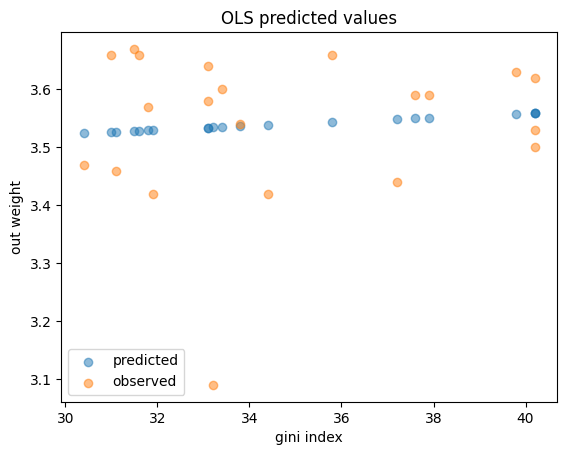

In [90]:
fix, ax = plt.subplots()
ax.scatter(out_weights_df['Gini Index'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(out_weights_df['Gini Index'], out_weights_df['Total Out-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('gini index')
ax.set_ylabel('out weight')
plt.show()